In [68]:
#1 - Import the necessary Python libraries

import pandas as pd # Used for working with dataframes
import numpy as np # Used for mathematical/statistical functions 
import matplotlib.pyplot as plt # Used for visualization 
import seaborn as sns # Additional visualization built upoun matplot

In [85]:
df = pd.read_csv('../Data/UTF_Data4.csv', sep=';') #'hack' to go a folder back + go to the 
df

,Company name,Org. no,Last annual report,Currency,"Num. of employees, stock company 2020 (pcs)","Num. of employees, stock company 2019 (pcs)","Num. of employees, stock company 2018 (pcs)","Num. of employees, stock company 2017 (pcs)","Num. of employees, stock company 2016 (pcs)","Num. of employees, stock company 2015 (pcs)",...,Debt/equity ratio 2019 (%),Debt/equity ratio 2018 (%),Debt/equity ratio 2017 (%),Debt/equity ratio 2016 (%),Debt/equity ratio 2015 (%),Debt/equity ratio 2014 (%),Debt/equity ratio 2013 (%),Debt/equity ratio 2012 (%),Debt/equity ratio 2011 (%),Debt/equity ratio 2010 (%)
0,Ekman Invest Holding AB,5567121602,201912,SEK,-,301,0,283,279,43,...,"6,72","6,91","5,23","5,41","5,15","7,64","6,14","5,71","5,97","4,94"
1,Axfood Snabbgross AB,5560003575,201912,SEK,-,411,401,384,365,335,...,"8,44","12,06","12,1","15,42","15,66","11,61","10,54","12,19","13,16","15,34"
2,LWW Group AB,5565295333,201912,SEK,-,347,361,337,332,340,...,"1,91","1,77","1,77","1,1","0,87","1,12","1,05","1,02","0,29","0,33"
3,Atteviks Bil Aktiebolag,5562130400,201912,SEK,-,453,443,434,419,407,...,"0,93","0,77","1,04","1,07","1,31","1,07","0,76","0,87","1,03","1,34"
4,SINKABERG INVEST AS,988947857,201912,NOK,-,242,228,0,0,0,...,"0,45","0,46","0,43","0,58","0,6","0,65","0,8","0,63",-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,G. TSCHERNING A/S,26378443,202004,DKK,-,200,200,200,200,200,...,0,0,0,0,0,0,0,0,-,-
904,TL BYG A/S,74101119,201906,DKK,-,200,-,200,200,200,...,0,-,0,0,0,0,0,-,-,-
905,ONEPARK AS,998638984,201912,NOK,-,202,0,185,58,0,...,"1,96","4,04","1,41","0,57","11,38","5,12","3,6","0,6",-,-
906,SAIPEM DRILLING NORWAY AS,998277418,201912,EUR,-,224,190,230,223,225,...,"18,5","17,43",-238 454,"15,5","2,48","4,66","2,56","2,79",-,-


In [86]:
#2: Missing Data Percentage List
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Company name - 0.0%
Org. no - 0.0%
Last annual report - 0.0%
Currency - 0.0%
Num. of employees, stock company 2020 (pcs) - 0.0%
Num. of employees, stock company 2019 (pcs) - 0.0%
Num. of employees, stock company 2018 (pcs) - 0.0%
Num. of employees, stock company 2017 (pcs) - 0.0%
Num. of employees, stock company 2016 (pcs) - 0.0%
Num. of employees, stock company 2015 (pcs) - 0.0%
Num. of employees, stock company 2014 (pcs) - 0.0%
Num. of employees, stock company 2013 (pcs) - 0.0%
Num. of employees, stock company 2012 (pcs) - 0.0%
Num. of employees, stock company 2011 (pcs) - 0.0%
Num. of employees, stock company 2010 (pcs) - 0.0%
EBITDA 2020 (k) - 0.0%
EBITDA 2019 (k) - 0.0%
EBITDA 2018 (k) - 0.0%
EBITDA 2017 (k) - 0.0%
EBITDA 2016 (k) - 0.0%
EBITDA 2015 (k) - 0.0%
EBITDA 2014 (k) - 0.0%
EBITDA 2013 (k) - 0.0%
EBITDA 2012 (k) - 0.0%
EBITDA 2011 (k) - 0.0%
EBITDA 2010 (k) - 0.0%
Gross profit/loss 2020 (k) - 0.0%
Gross profit/loss 2019 (k) - 0.0%
Gross profit/loss 2018 (k) - 0.0%
Gross p

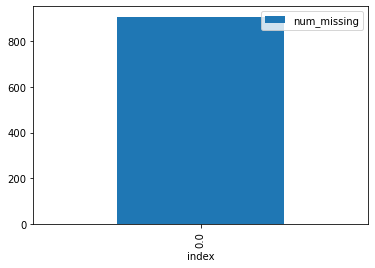

In [87]:
#3: Missing Data Histogram

# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

#THERE IS NO MISSING VALUES

In [88]:
#remove columns with a lot of NaN values
df=df.loc[:,df.isnull().mean()<0.8]
df

,Company name,Org. no,Last annual report,Currency,"Num. of employees, stock company 2020 (pcs)","Num. of employees, stock company 2019 (pcs)","Num. of employees, stock company 2018 (pcs)","Num. of employees, stock company 2017 (pcs)","Num. of employees, stock company 2016 (pcs)","Num. of employees, stock company 2015 (pcs)",...,Debt/equity ratio 2018 (%),Debt/equity ratio 2017 (%),Debt/equity ratio 2016 (%),Debt/equity ratio 2015 (%),Debt/equity ratio 2014 (%),Debt/equity ratio 2013 (%),Debt/equity ratio 2012 (%),Debt/equity ratio 2011 (%),Debt/equity ratio 2010 (%),num_missing
0,Ekman Invest Holding AB,5567121602,201912,SEK,-,301,0,283,279,43,...,"6,91","5,23","5,41","5,15","7,64","6,14","5,71","5,97","4,94",0.0
1,Axfood Snabbgross AB,5560003575,201912,SEK,-,411,401,384,365,335,...,"12,06","12,1","15,42","15,66","11,61","10,54","12,19","13,16","15,34",0.0
2,LWW Group AB,5565295333,201912,SEK,-,347,361,337,332,340,...,"1,77","1,77","1,1","0,87","1,12","1,05","1,02","0,29","0,33",0.0
3,Atteviks Bil Aktiebolag,5562130400,201912,SEK,-,453,443,434,419,407,...,"0,77","1,04","1,07","1,31","1,07","0,76","0,87","1,03","1,34",0.0
4,SINKABERG INVEST AS,988947857,201912,NOK,-,242,228,0,0,0,...,"0,46","0,43","0,58","0,6","0,65","0,8","0,63",-,-,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,G. TSCHERNING A/S,26378443,202004,DKK,-,200,200,200,200,200,...,0,0,0,0,0,0,0,-,-,0.0
904,TL BYG A/S,74101119,201906,DKK,-,200,-,200,200,200,...,-,0,0,0,0,0,-,-,-,0.0
905,ONEPARK AS,998638984,201912,NOK,-,202,0,185,58,0,...,"4,04","1,41","0,57","11,38","5,12","3,6","0,6",-,-,0.0
906,SAIPEM DRILLING NORWAY AS,998277418,201912,EUR,-,224,190,230,223,225,...,"17,43",-238 454,"15,5","2,48","4,66","2,56","2,79",-,-,0.0


In [89]:
df = df.fillna(0) #it replaces all the nulls values with a 0 
df

,Company name,Org. no,Last annual report,Currency,"Num. of employees, stock company 2020 (pcs)","Num. of employees, stock company 2019 (pcs)","Num. of employees, stock company 2018 (pcs)","Num. of employees, stock company 2017 (pcs)","Num. of employees, stock company 2016 (pcs)","Num. of employees, stock company 2015 (pcs)",...,Debt/equity ratio 2018 (%),Debt/equity ratio 2017 (%),Debt/equity ratio 2016 (%),Debt/equity ratio 2015 (%),Debt/equity ratio 2014 (%),Debt/equity ratio 2013 (%),Debt/equity ratio 2012 (%),Debt/equity ratio 2011 (%),Debt/equity ratio 2010 (%),num_missing
0,Ekman Invest Holding AB,5567121602,201912,SEK,-,301,0,283,279,43,...,"6,91","5,23","5,41","5,15","7,64","6,14","5,71","5,97","4,94",0.0
1,Axfood Snabbgross AB,5560003575,201912,SEK,-,411,401,384,365,335,...,"12,06","12,1","15,42","15,66","11,61","10,54","12,19","13,16","15,34",0.0
2,LWW Group AB,5565295333,201912,SEK,-,347,361,337,332,340,...,"1,77","1,77","1,1","0,87","1,12","1,05","1,02","0,29","0,33",0.0
3,Atteviks Bil Aktiebolag,5562130400,201912,SEK,-,453,443,434,419,407,...,"0,77","1,04","1,07","1,31","1,07","0,76","0,87","1,03","1,34",0.0
4,SINKABERG INVEST AS,988947857,201912,NOK,-,242,228,0,0,0,...,"0,46","0,43","0,58","0,6","0,65","0,8","0,63",-,-,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,G. TSCHERNING A/S,26378443,202004,DKK,-,200,200,200,200,200,...,0,0,0,0,0,0,0,-,-,0.0
904,TL BYG A/S,74101119,201906,DKK,-,200,-,200,200,200,...,-,0,0,0,0,0,-,-,-,0.0
905,ONEPARK AS,998638984,201912,NOK,-,202,0,185,58,0,...,"4,04","1,41","0,57","11,38","5,12","3,6","0,6",-,-,0.0
906,SAIPEM DRILLING NORWAY AS,998277418,201912,EUR,-,224,190,230,223,225,...,"17,43",-238 454,"15,5","2,48","4,66","2,56","2,79",-,-,0.0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 82 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Company name                                 908 non-null    object 
 1   Org. no                                      908 non-null    int64  
 2   Last annual report                           908 non-null    object 
 3   Currency                                     908 non-null    object 
 4   Num. of employees, stock company 2020 (pcs)  908 non-null    object 
 5   Num. of employees, stock company 2019 (pcs)  908 non-null    object 
 6   Num. of employees, stock company 2018 (pcs)  908 non-null    object 
 7   Num. of employees, stock company 2017 (pcs)  908 non-null    object 
 8   Num. of employees, stock company 2016 (pcs)  908 non-null    object 
 9   Num. of employees, stock company 2015 (pcs)  908 non-null    object 
 10  Nu

In [74]:
df.Currency.unique()

array(['SEK', 'NOK', 'DKK', 'EUR', 'USD'], dtype=object)

In [75]:
df[df.Currency=='SEK'] #we only want the rows that has 'SEK' currency, removing the rows 

,Company name,Org. no,Last annual report,Currency,"Num. of employees, stock company 2019 (pcs)","Num. of employees, stock company 2018 (pcs)","Num. of employees, stock company 2017 (pcs)","Num. of employees, stock company 2016 (pcs)","Num. of employees, stock company 2015 (pcs)","Num. of employees, stock company 2014 (pcs)",...,Debt/equity ratio 2018 (%)_ismissing,Debt/equity ratio 2017 (%)_ismissing,Debt/equity ratio 2016 (%)_ismissing,Debt/equity ratio 2015 (%)_ismissing,Debt/equity ratio 2014 (%)_ismissing,Debt/equity ratio 2013 (%)_ismissing,Debt/equity ratio 2012 (%)_ismissing,Debt/equity ratio 2011 (%)_ismissing,Debt/equity ratio 2010 (%)_ismissing,num_missing
0,Ekman Invest Holding AB,5567121602,201912,SEK,301,NaN,283,279,43,270,...,False,False,False,False,False,False,False,False,False,28
1,Axfood Snabbgross AB,5560003575,201912,SEK,411,401,384,365,335,316,...,False,False,False,False,False,False,False,False,False,18
2,LWW Group AB,5565295333,201912,SEK,347,361,337,332,340,346,...,False,False,False,False,False,False,False,False,False,29
3,Atteviks Bil Aktiebolag,5562130400,201912,SEK,453,443,434,419,407,344,...,False,False,False,False,False,False,False,False,False,17
5,GIPEJO Förvaltnings Aktiebolag,5563246312,201912,SEK,272,245,203,193,172,154,...,False,False,False,False,False,False,False,False,False,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,Teknostäd Aktiebolag,5562414366,201906,SEK,330,350,280,260,241,260,...,False,False,False,False,False,False,False,False,False,27
831,Data Ductus AB,5565042941,201912,SEK,200,176,156,134,121,66,...,True,False,False,False,False,False,False,False,False,31
842,Data Ductus Partners AB,5591762082,201912,SEK,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,True,True,True,73
845,Nolato MediTech AB,5563090678,201912,SEK,NaN,256,226,192,245,179,...,False,False,False,False,False,False,False,False,False,32


In [7]:
#Visualizing NumAccountingYears column with outliers - skewed spread! 

plt.figure(figsize=(16,6))#defining the size of the visualization, to make it prettier
sns.distplot(df['Num. of employees, stock company (pcs)'])#number of acc. years based on the entire population
#x=year,y=

KeyError: 'Num. of employees, stock company (pcs)'

<Figure size 1152x432 with 0 Axes>

In [76]:
df.groupby('Num. of employees, stock company (pcs)').describe().transpose()

KeyError: 'Num. of employees, stock company (pcs)'

In [ ]:
#3 - Look at the data and basic cleaning 

# Remove ID colmun (we don't need this and it will polute the model):

df = df.drop('ID', axis = 1) #meaning that its the first axis in the table